# **Homework 3 - Naive Bayes with Gaussian distribution**
#### Imports and Visualization

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml, load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

try:
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X, y = mnist.data / 255.0, mnist.target.astype(int)
except Exception:
    digits = load_digits()
    X, y = digits.data / 16.0, digits.target

print("Dataset loaded:", X.shape, y.shape)

Dataset loaded: (70000, 784) (70000,)


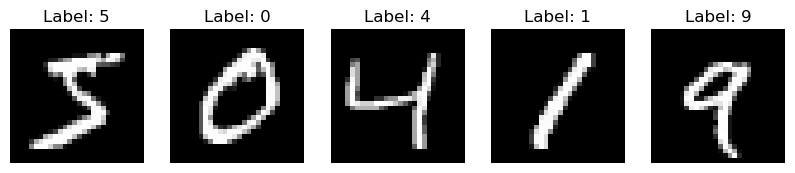

In [85]:
# Visualize some samples
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(28, 28) if X.shape[1] == 784 else X[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()

####

# **Implimenting Naive Bayes with Gaussian distribution**
### **Creating splits for Training / Testing**

In [86]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (56000, 784) Test: (14000, 784)


### **Gaussian Naive Bayes Model**

In [87]:
class GaussianNBStudent:
    
    # Initializing the model 
    def __init__(self, var_smoothing=1e-9):
        # This program assumes that classes include all of 0-9 AND image size is static
        self.numClasses = 10
        self.numFeatures = 784
        self.var_smoothing = var_smoothing
        self.mean = np.zeros((self.numClasses, self.numFeatures))
        self.variance = np.zeros((self.numClasses, self.numFeatures))
        self.priors = np.zeros(self.numClasses)


    def fit(self, X, y):
        # Estimating priors, means, and variances for each class 0-9
        for c in range(self.numClasses):
            # X, but only for class c
            XC = X[y == c]
            # Calculating priors, mean, and variance for all features in class c
            self.priors[c] = np.log(len(XC) / len(X))
            self.mean[c, :] = np.mean(XC, axis=0)
            self.variance[c, :] = np.var(XC, axis=0) + self.var_smoothing
        pass

    
    def _joint_log_likelihood(self, X):
        # Computing log-posterior / Gaussian likelihood for each class and adding log priors        
        # Initializing P(c|x)
        testCases = X.shape[0]
        posterior = np.zeros((testCases, self.numClasses))

        # Calculating the poteriour for each class
        # P(c|x) => likelyhood of this class given these features
        for c in range(self.numClasses):
            mean = self.mean[c, :]
            variance = self.variance[c, :]
            # This is the Log-Posterior function
            posterior[:, c] = self.priors[c] -0.5*np.sum( np.log(2*np.pi*variance) + (((X-mean)**2) / variance), axis=1)

        return posterior

    
    def predict(self, X):
        # Calculating the likelyhoods for each class for each testcase
        posterior = self._joint_log_likelihood(X)
        # Returning the case with the maximum likelyhood
        return np.argmax(posterior, axis=1)


####   

# **Testing and Evaluation**
### **Creating and Testing the Model on Novel Test Cases**

In [88]:
# Initializing model
model = GaussianNBStudent()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

### **Evaluating Preformance**

In [89]:
# Evaluating accuracy
print("\nOverall Accuracy:", accuracy_score(y_test, y_pred), "\n\n")

# Showing the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred), "\n\n")### **Evaluating Preformance**
print(classification_report(y_test, y_pred), "\n\n")


Overall Accuracy: 0.5649285714285714 


[[1179    4    4    3    4    6   46    0  110   25]
 [   0 1487    5    3    0    5   22    2   34   17]
 [  97   31  462  101   10    7  337    3  333   17]
 [  39   76   11  514    3    9   60    8  579  129]
 [  21   15   19   12  230    6   92    8  315  647]
 [  94   46   10   26    5   67   59    4  831  121]
 [  13   35    9    1    1    3 1272    0   38    3]
 [   4   14    1   11   10    2    5  477   50  885]
 [  20  188    8    6    4    8   13    2  923  193]
 [   6   16    2    3    9    0    2   25   30 1298]] 


              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1381
           1       0.78      0.94      0.85      1575
           2       0.87      0.33      0.48      1398
           3       0.76      0.36      0.49      1428
           4       0.83      0.17      0.28      1365
           5       0.59      0.05      0.10      1263
           6       0.67      0.93      0.77   